In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
train = pd.read_csv('/content/data/train.csv')
test = pd.read_csv('/content/data/test.csv')

In [ ]:
train.shape

(891, 12)

анализ и обработка данных

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test_passid = test['PassengerId']

In [ ]:
train = train.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)
test = test.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)

In [ ]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


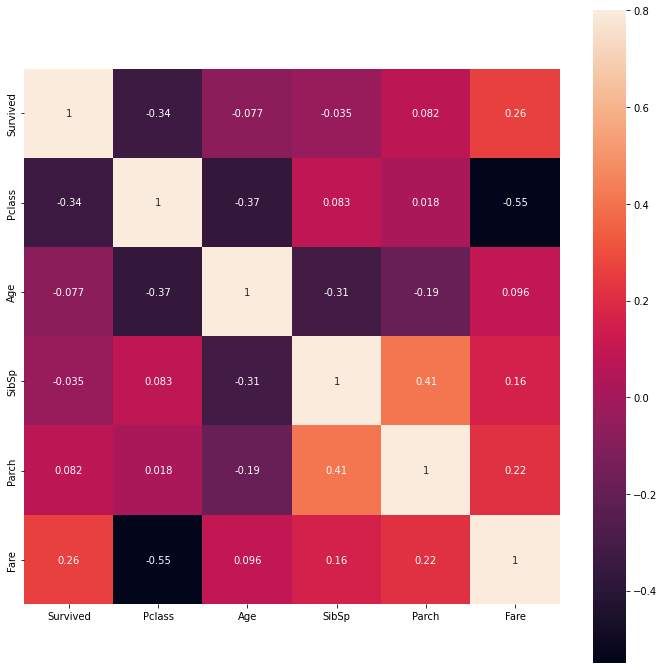

In [ ]:
corrmat = train.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

In [ ]:
cols = train.select_dtypes(include='object').columns


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))
    test[c] = lbl.transform(list(test[c].values))

print('Shape all_data: {}'.format(train.shape))

Shape all_data: (891, 8)


In [ ]:
train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [ ]:
Y = train['Survived']

In [ ]:
train_age = train
# train_age
train_age.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [ ]:
train = train.drop(['Survived'], axis=1)

In [ ]:
train['Age'] = train['Age']. fillna(train['Age'].mean())
test['Age'] = train['Age']. fillna(train['Age'].mean())

In [ ]:
train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
test['Fare'] = train['Fare']. fillna(train['Fare'].mean())

предсказание параметра Age

In [ ]:
# corrmat = train.corr()
# plt.figure(figsize=(12, 12))
# sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

In [ ]:
# from xgboost.sklearn import XGBRegressor
# import xgboost as xgb
# from sklearn.metrics import mean_squared_error

In [ ]:
# age_isnull = train_age[train_age.isnull().any(1)]
# age_isnull = age_isnull.drop('Age', axis=1)

In [ ]:
# train_age = train_age.dropna()

In [ ]:
# train_age.shape

In [ ]:
# train_age_Y = train_age['Age']
# train_age = train_age.drop('Age', axis=1)

In [ ]:
# train_age.columns

In [ ]:
# model_xgbreg = xgb.XGBRegressor(n_estimators=1000)

In [ ]:
# model_xgbreg.fit(train_age, train_age_Y)
# # pred_age = model_xgbreg.predict(age_isnull)
# pred_age = model_xgbreg.predict(train_age)

In [ ]:
# pred_age[:10]

In [ ]:
# train_age_Y[:10]

In [ ]:
# rmse_xgb = mean_squared_error(train_age_Y, pred_age,squared=False)
# rmse_xgb

In [ ]:
# model_xgbreg.predict(age_isnull)

In [ ]:
# age_isnull['Age'] = model_xgbreg.predict(age_isnull)

In [ ]:
# age_isnull

In [ ]:
# train[train.isnull().any(1)] = age_isnull

In [ ]:
# train.isnull().sum()

xgboost

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [ ]:
from xgboost.sklearn import XGBClassifier
model_xgb = xgb.XGBClassifier(n_estimators=2000)

In [ ]:
model_xgb.fit(train, Y)
xgb_pred = model_xgb.predict(test)
# xgb_pred = model_xgb.predict(train)

In [ ]:
# accuracy_score(Y, xgb_pred)

submission File

In [ ]:
df = pd.DataFrame(test_passid)

In [ ]:
df.insert(loc=1,column='Survived',value=xgb_pred)

In [ ]:
df.to_csv('submission1.csv',index=False)

random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
model.fit(train, Y)
predictions = model.predict(test)

In [ ]:
# accuracy_score(Y, predictions)

In [ ]:
output = pd.DataFrame({'PassengerId': test_passid, 'Survived': predictions})
output.to_csv('submission2.csv', index=False)